In [1]:
import sys
import os
from pathlib import Path

sys.path.append(os.path.abspath(".."))

import matplotlib.pyplot as plt
import umap
import numpy as np

from utils.data import download_celeba_data, get_celeba_image_np_arrays

# Load CelebA images

In [2]:
download_celeba_data()

Data is already downloaded. Skipping download.


In [3]:
# WARNING!! The dataset is very large (1.7GB), so this will take a very long time
# Processing 10% of images took me 1 hour to load and compute UMAP embeddings (@ umap embedding_dim=2).
train_images, test_images = get_celeba_image_np_arrays(process_size=0.01)

Loading images...
2025 images loaded         


# UMAP embeddings

In [4]:
embedding_dim = 64

flat_train_images = train_images.reshape(train_images.shape[0], -1)
reducer = umap.UMAP(n_components=embedding_dim)
embeddings = reducer.fit_transform(flat_train_images)

In [5]:
# Save embeddings to a file
project_dir = Path("..").resolve()
embeddings_file = (
    project_dir
    / "data"
    / "img_align_celeba"
    / "umap_embeddings"
    / f"embeddings_d{embedding_dim}_n{len(embeddings)}.npy"
)
embeddings_file.parent.mkdir(parents=True, exist_ok=True)
np.save(embeddings_file, embeddings)

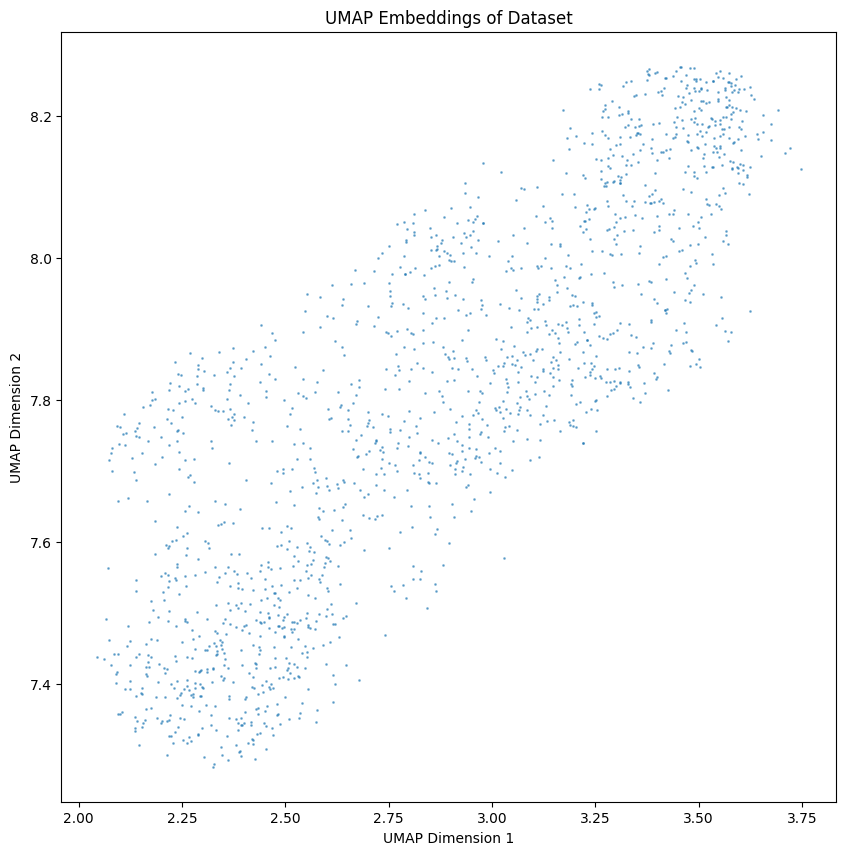

In [ ]:
# Plot embeddings
plt.figure(figsize=(6, 6))
plt.scatter(embeddings[:, 0], embeddings[:, 1], s=1, alpha=0.5)
plt.title("UMAP Embeddings of Dataset")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()